# <center>Visual data analysis in Python
## <center>Visualization: from Simple Distributions to Dimensionality Reduction

Visualization is often treated simply as a way to make interesting graphics for presentations, but in this project, I used it extensively at almost every stage to gain insights into the data.

## 1. Dataset

Before we get to the data, let's initialize our environment:

In [5]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv("telecom_churn.csv")

In [7]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## 2. Univariate visualization

Univariate analysis focuses on one feature at a time to understand its distribution and basic characteristics.

#### 2.1 Quantitative features

For features that are numerical, I started by examining their distributions.

##### Histograms and density plots

I created histograms to see how values of two numerical features were distributed:

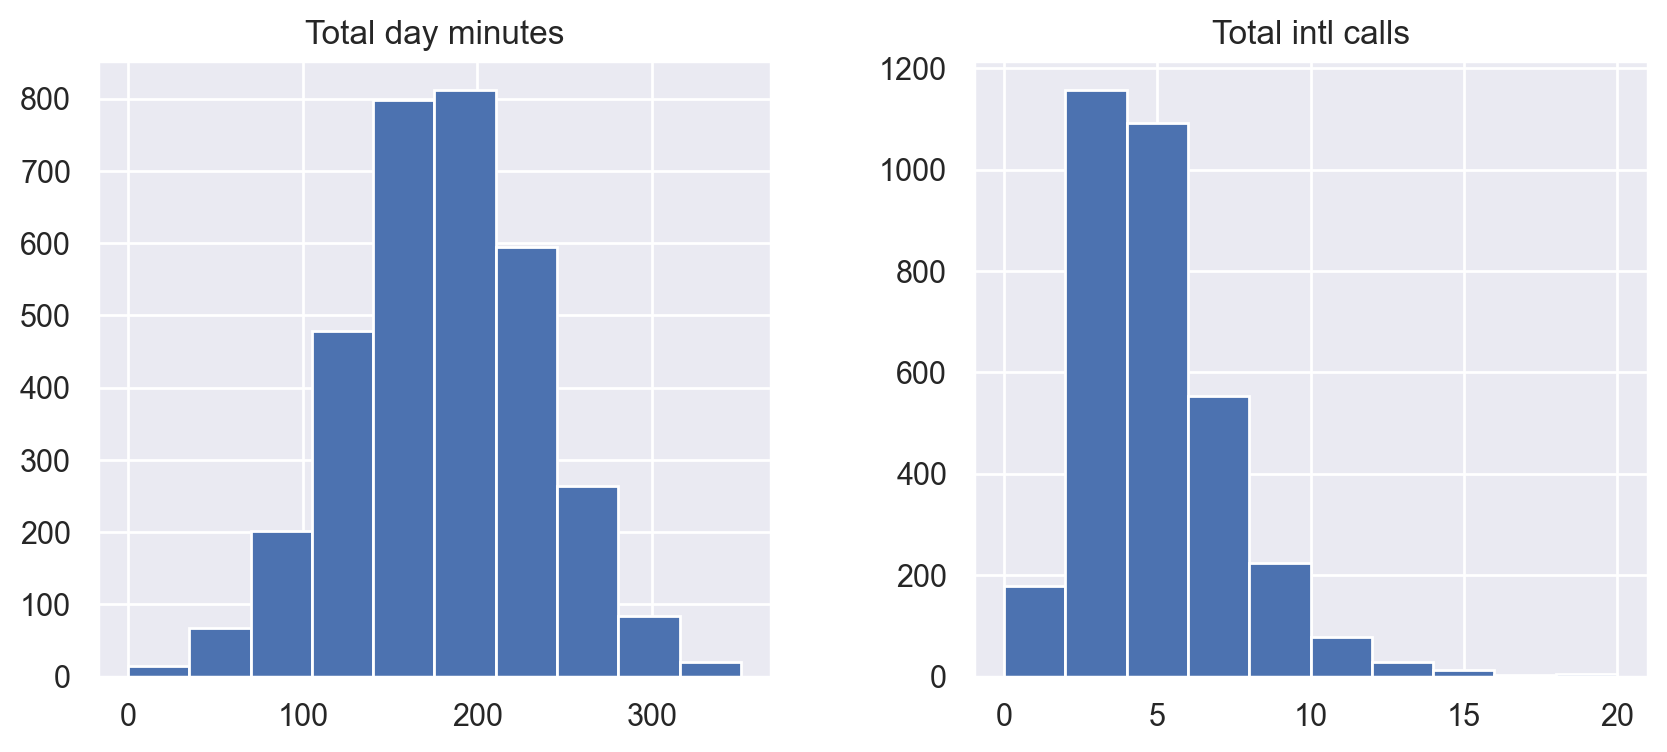

In [8]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

Histograms helped me see general distribution shapes (e.g., normal or skewed). Then I moved on to kernel density plots, which are smoother representations of the distributions:

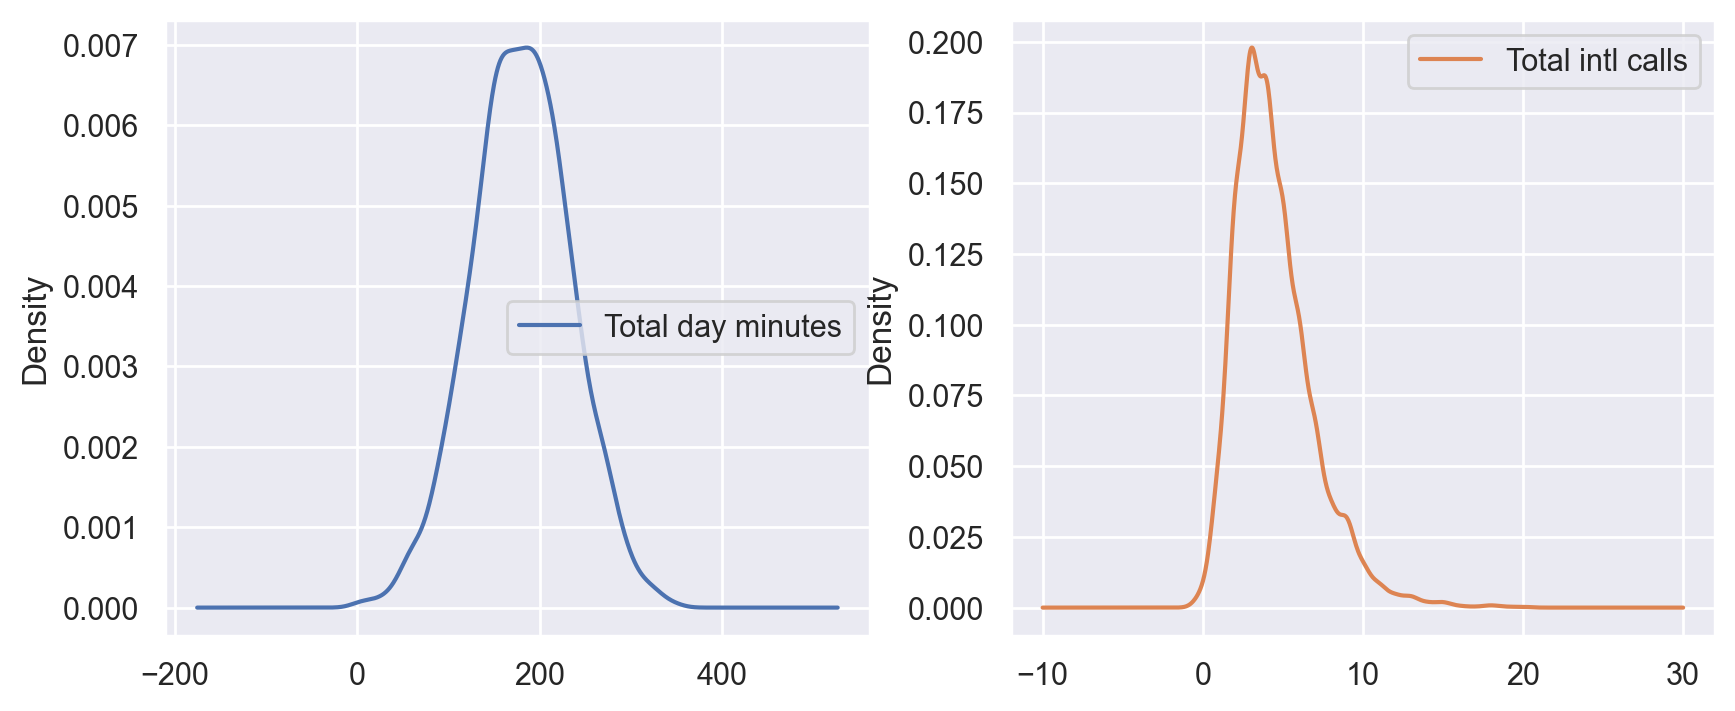

In [9]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

I noticed that Total day minutes resembled a normal distribution, while Total intl calls was skewed to the right.

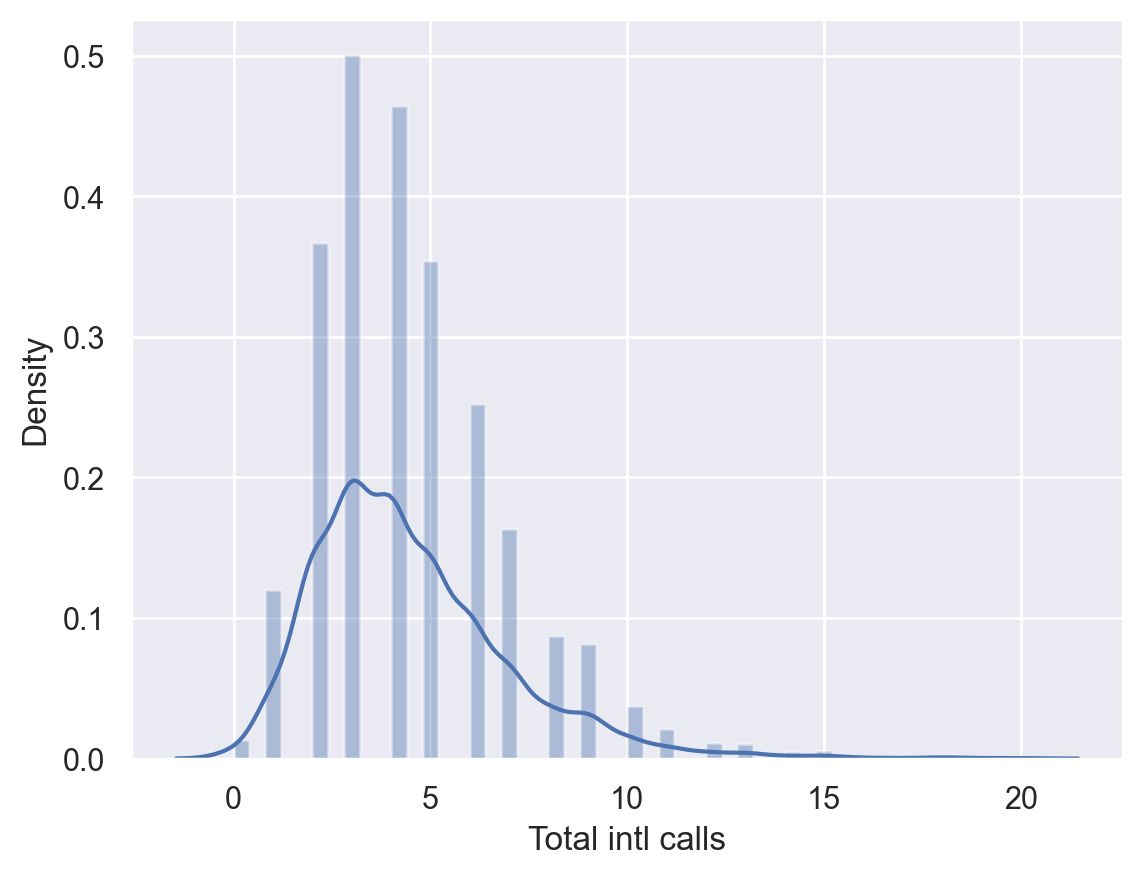

In [10]:
sns.distplot(df["Total intl calls"]);

##### Box plot

To explore distributions and detect outliers, I used box plots:

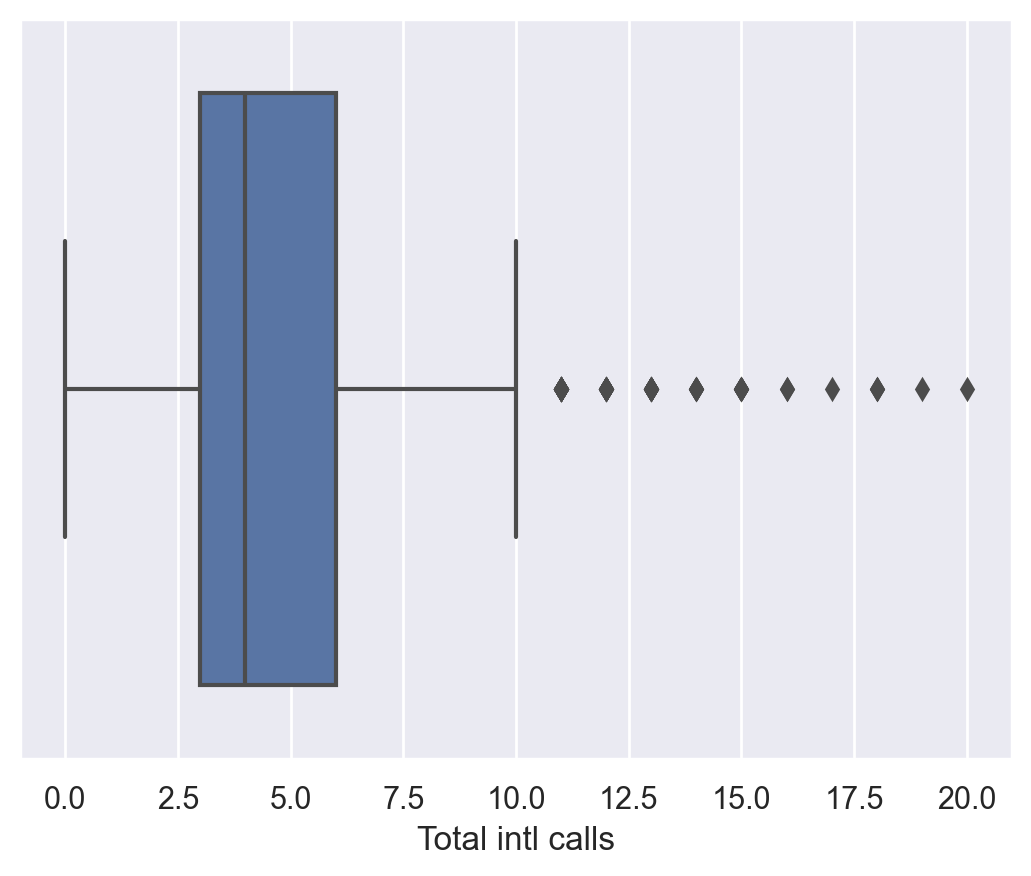

In [11]:
sns.boxplot(x="Total intl calls", data=df);

The box plot helped me see that calls in the higher range were relatively rare (outliers). For additional detail, I sometimes also use violin plots to see the density more vividly.

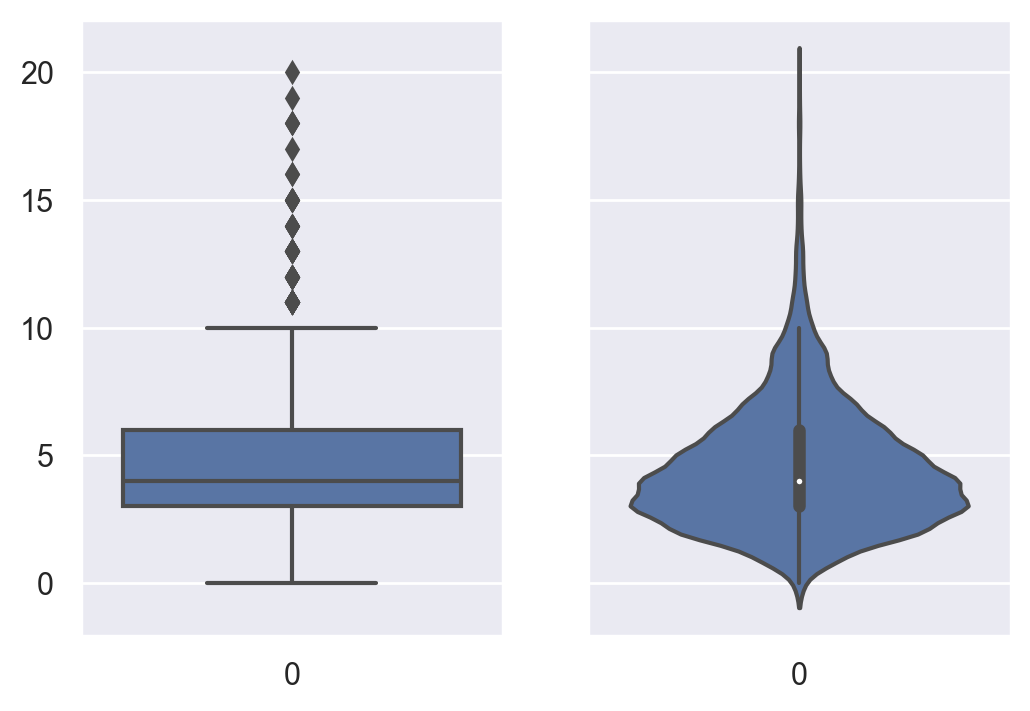

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [13]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#### Categorical and binary features
For categorical variables, I examined how often each category appeared using value_counts(). For example, checking the churn rate:

##### Frequency table
This table showed me the number of loyal vs. disloyal customers. The data was imbalanced—only a small portion had churned. This imbalance is important for later model training.



In [14]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

Bar Plots for Churn and Customer Service Calls

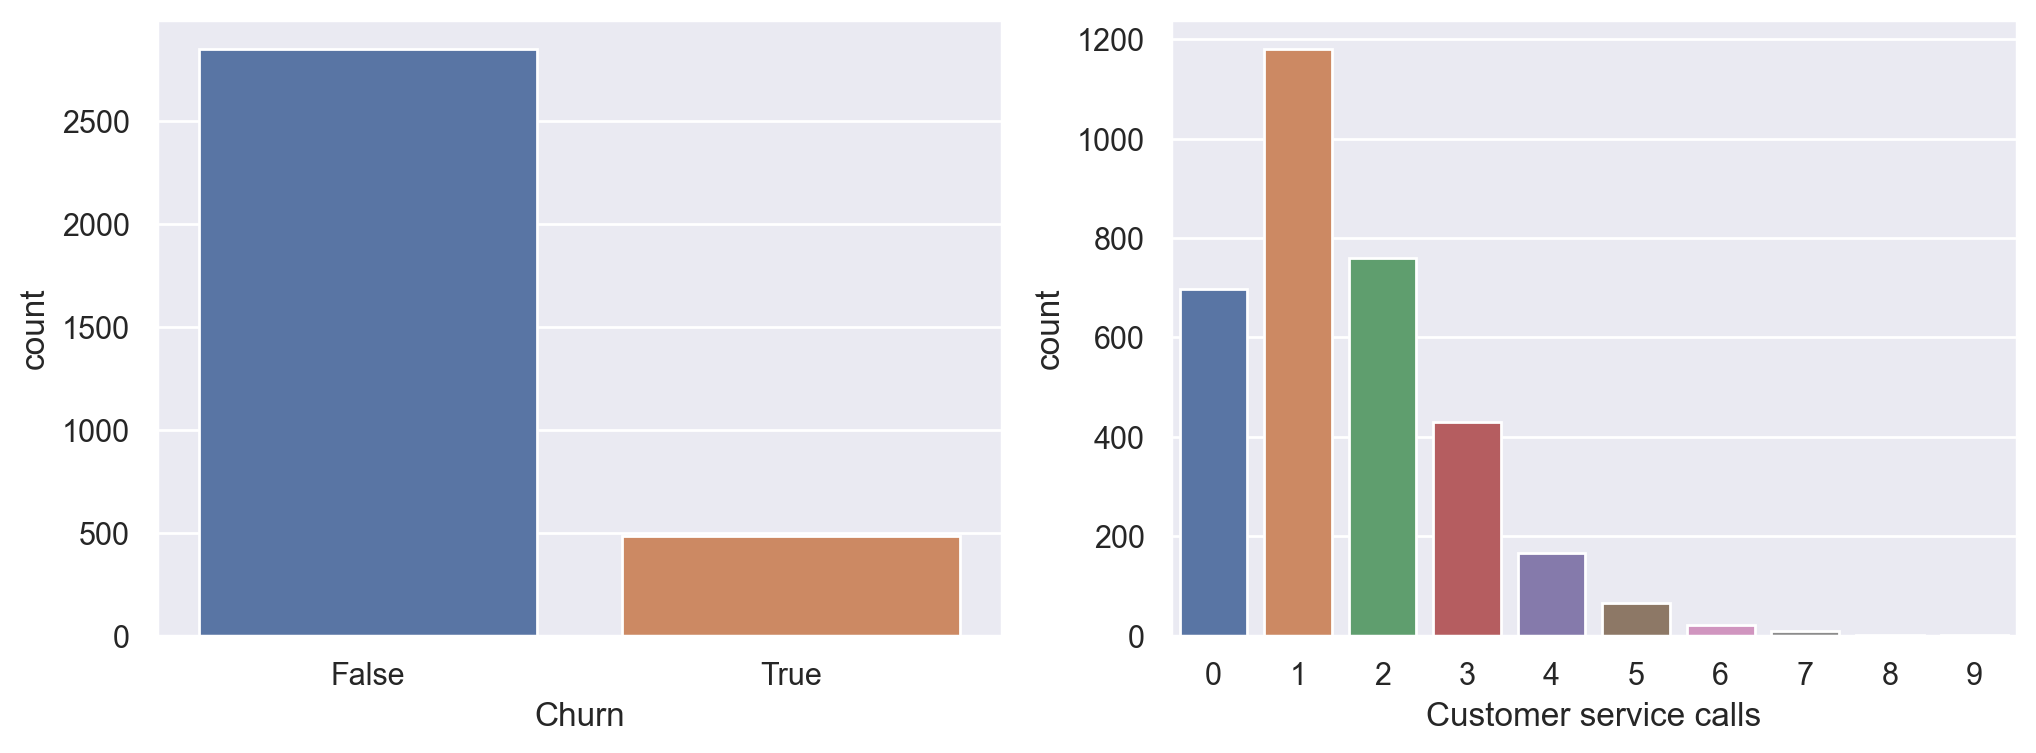

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

## 3. Multivariate visualization

Next, I moved to multivariate plots, which reveal how two or more features interact.

#### Quantitative vs. Quantitative

##### Correlation matrix


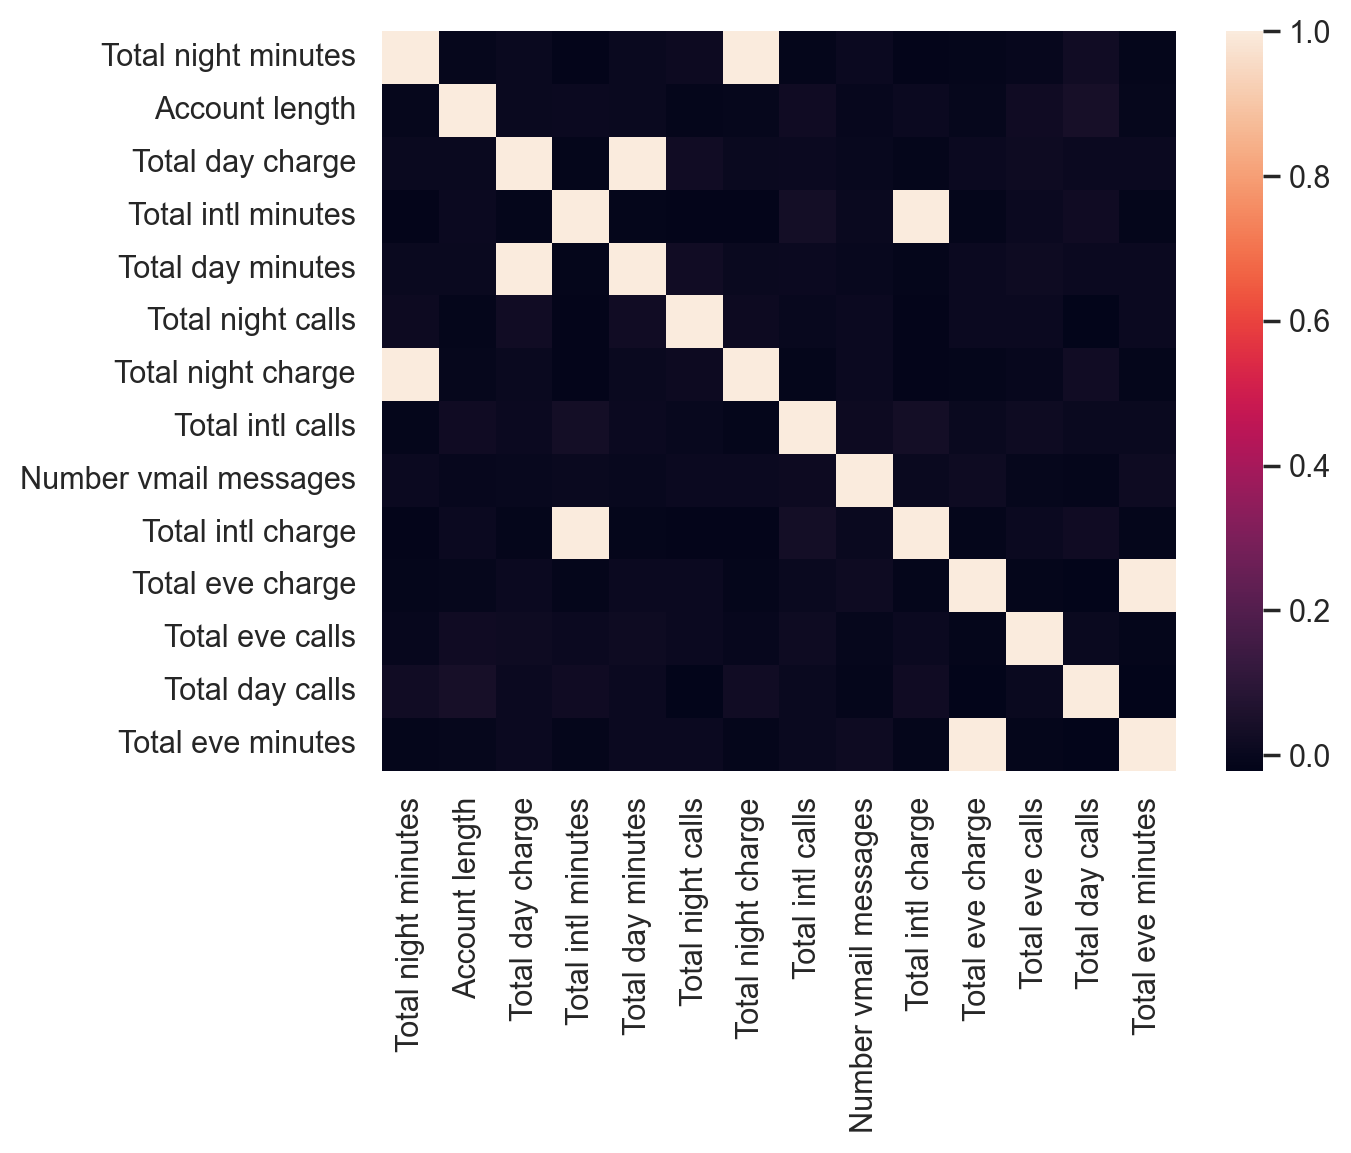

In [16]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

This helped me spot features that were direct computations of others, such as Total day charge being derived from Total day minutes. I excluded those redundant features for many analyses.

In [17]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

##### Scatter plot

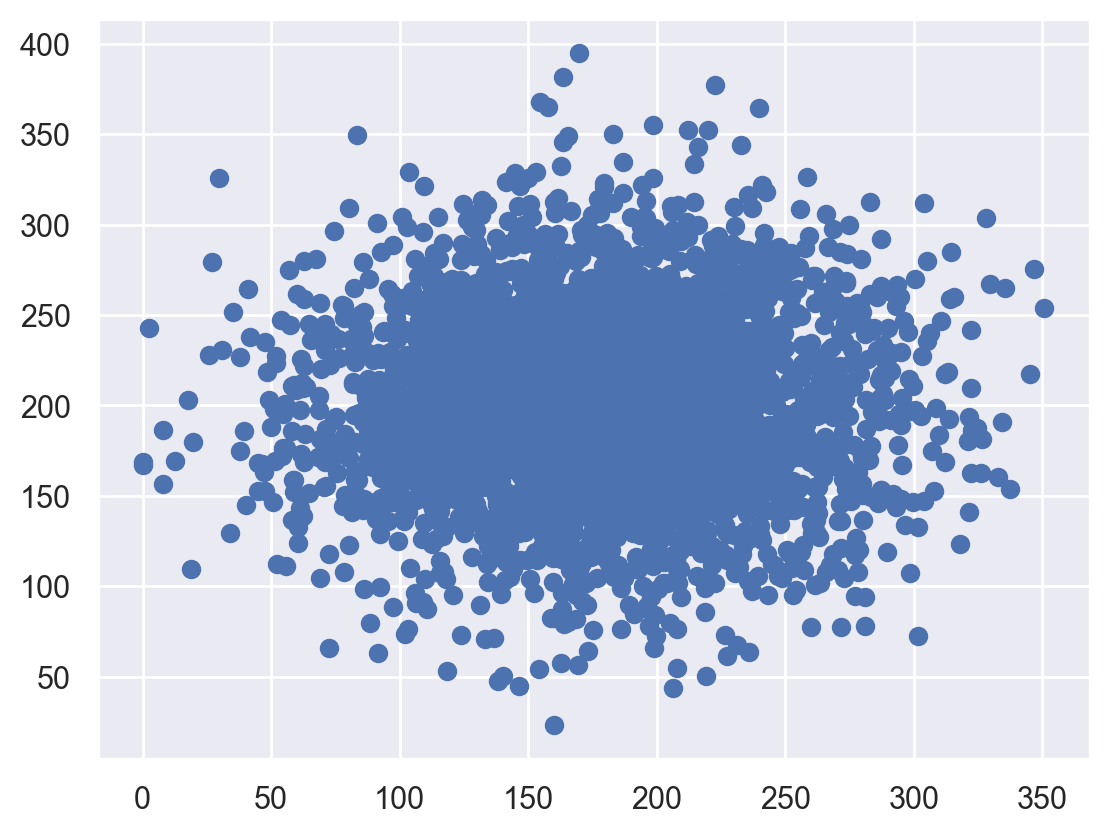

In [18]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

Joint Plot

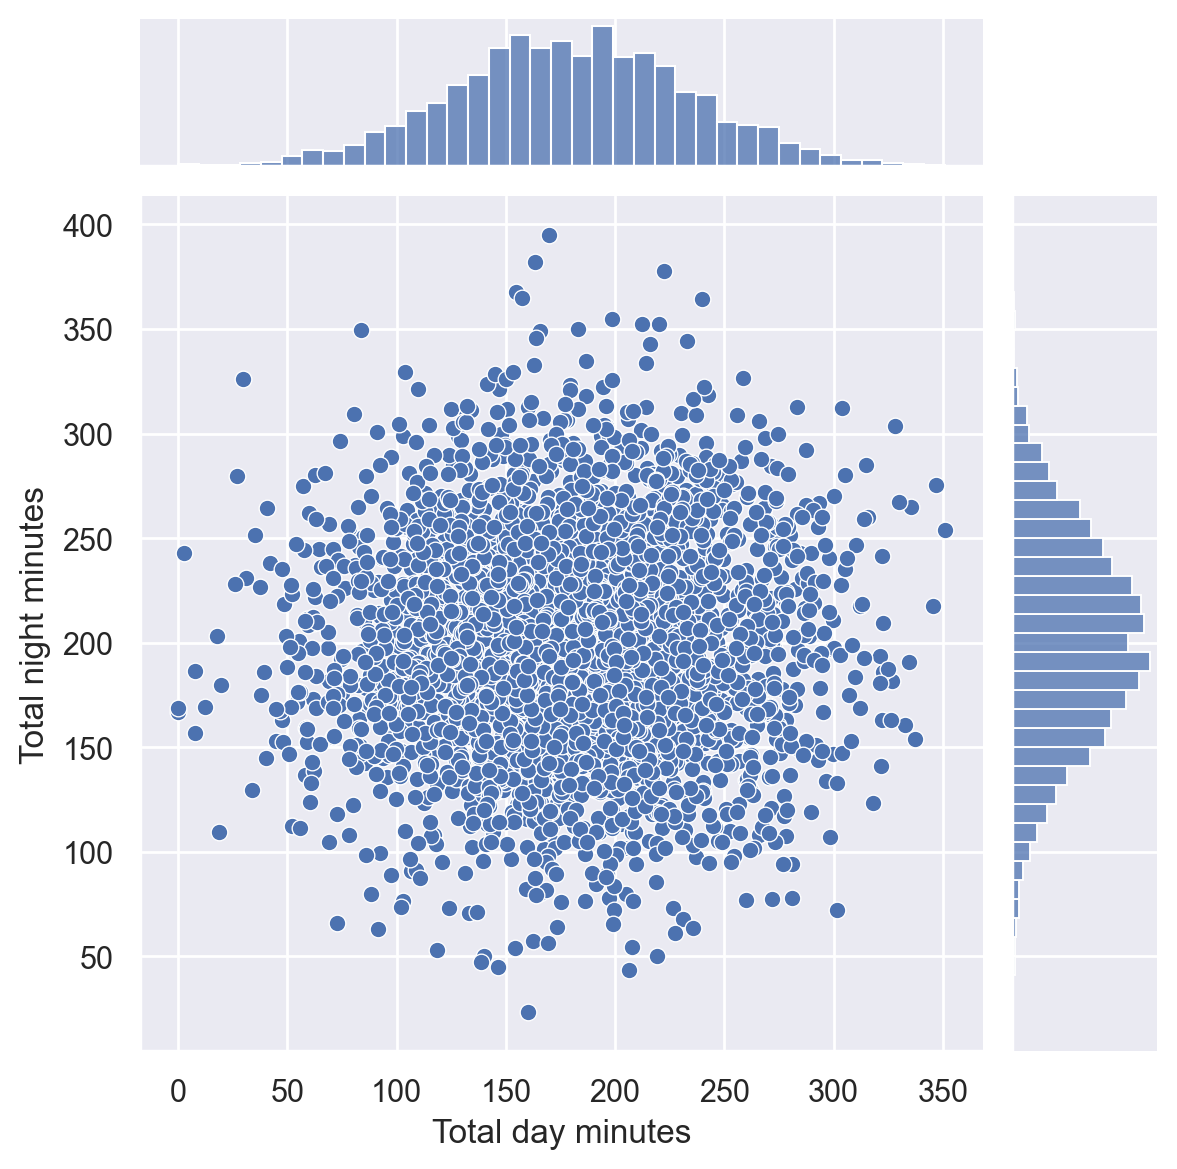

In [19]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

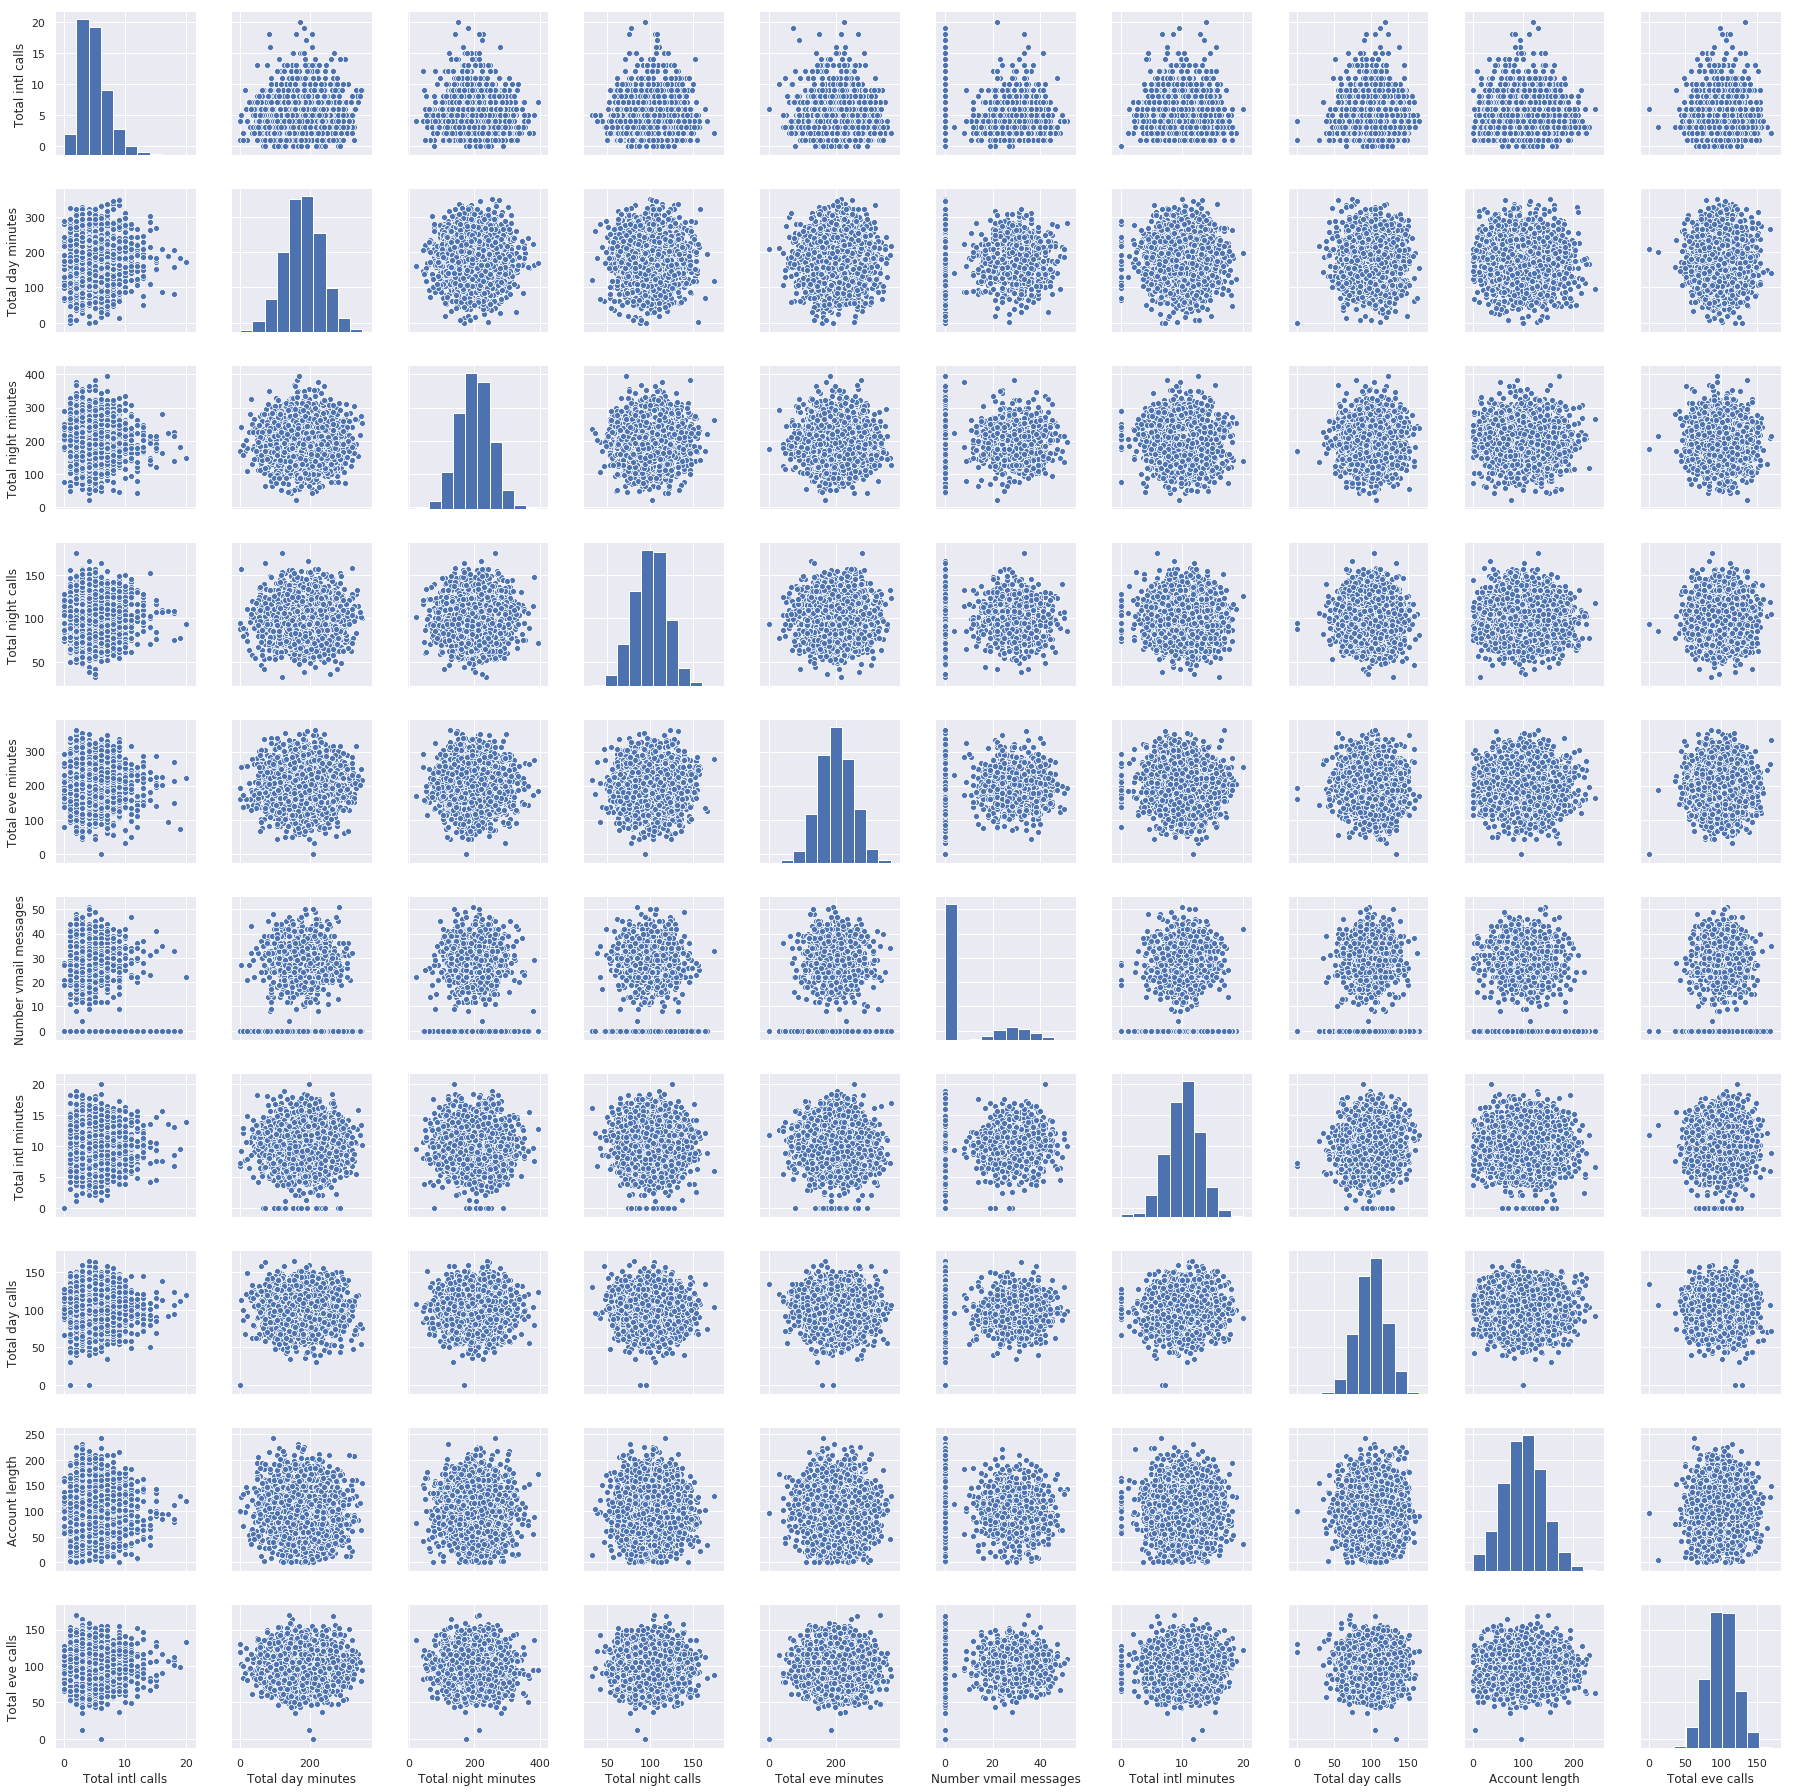

In [ ]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
%config InlineBackend.figure_format = 'retina'

#### Quantitative vs. Categorical

I frequently examined numerical features broken down by churn status (the target). For instance, a scatter plot with color coding:

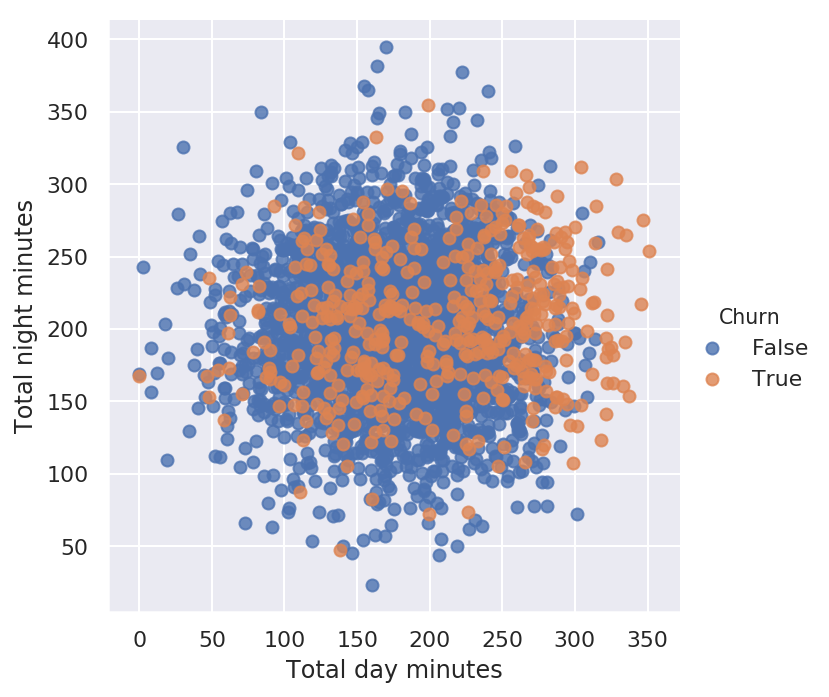

In [ ]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

Here, points were separated based on churn or non-churn, hinting that churners might spend more time on both day and night calls.

I also created box plots grouped by churn status:

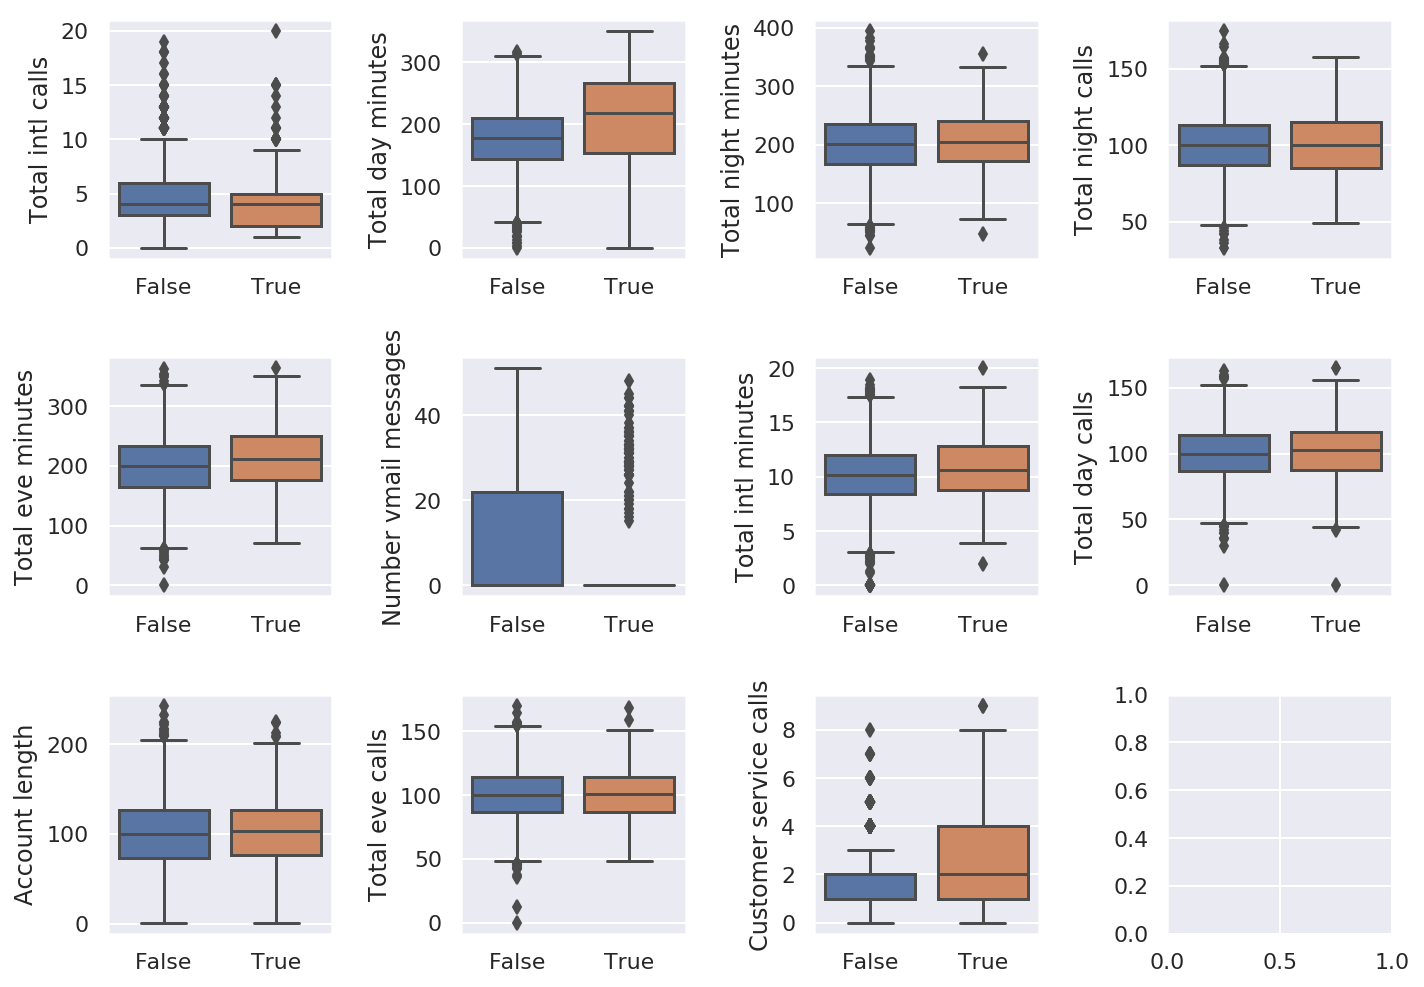

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

This quickly showed that churners tend to have higher Total day minutes and more Customer service calls on average.

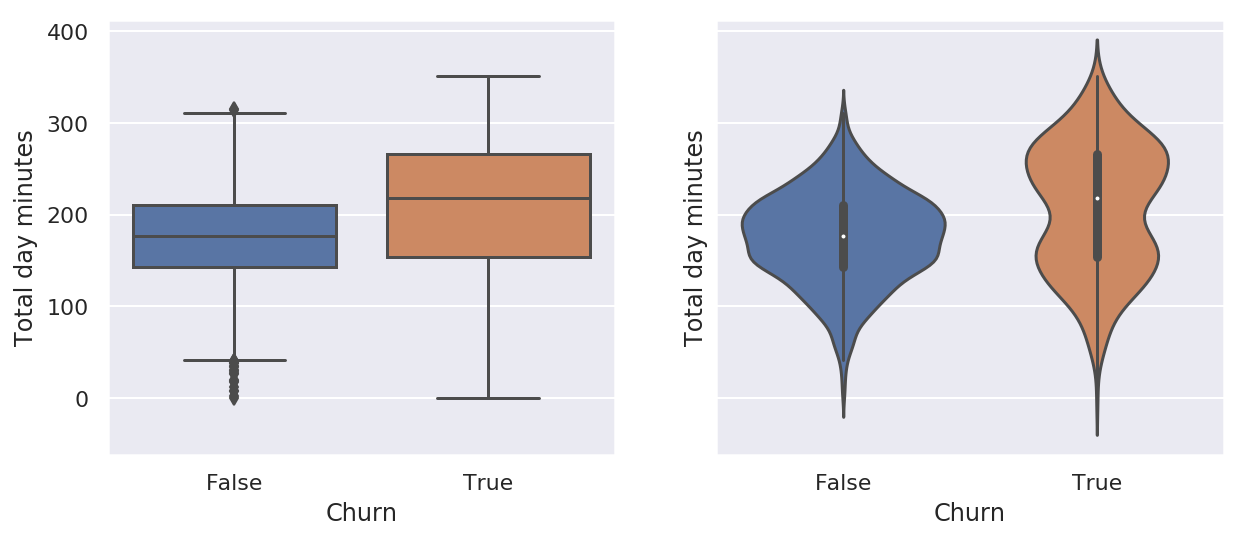

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

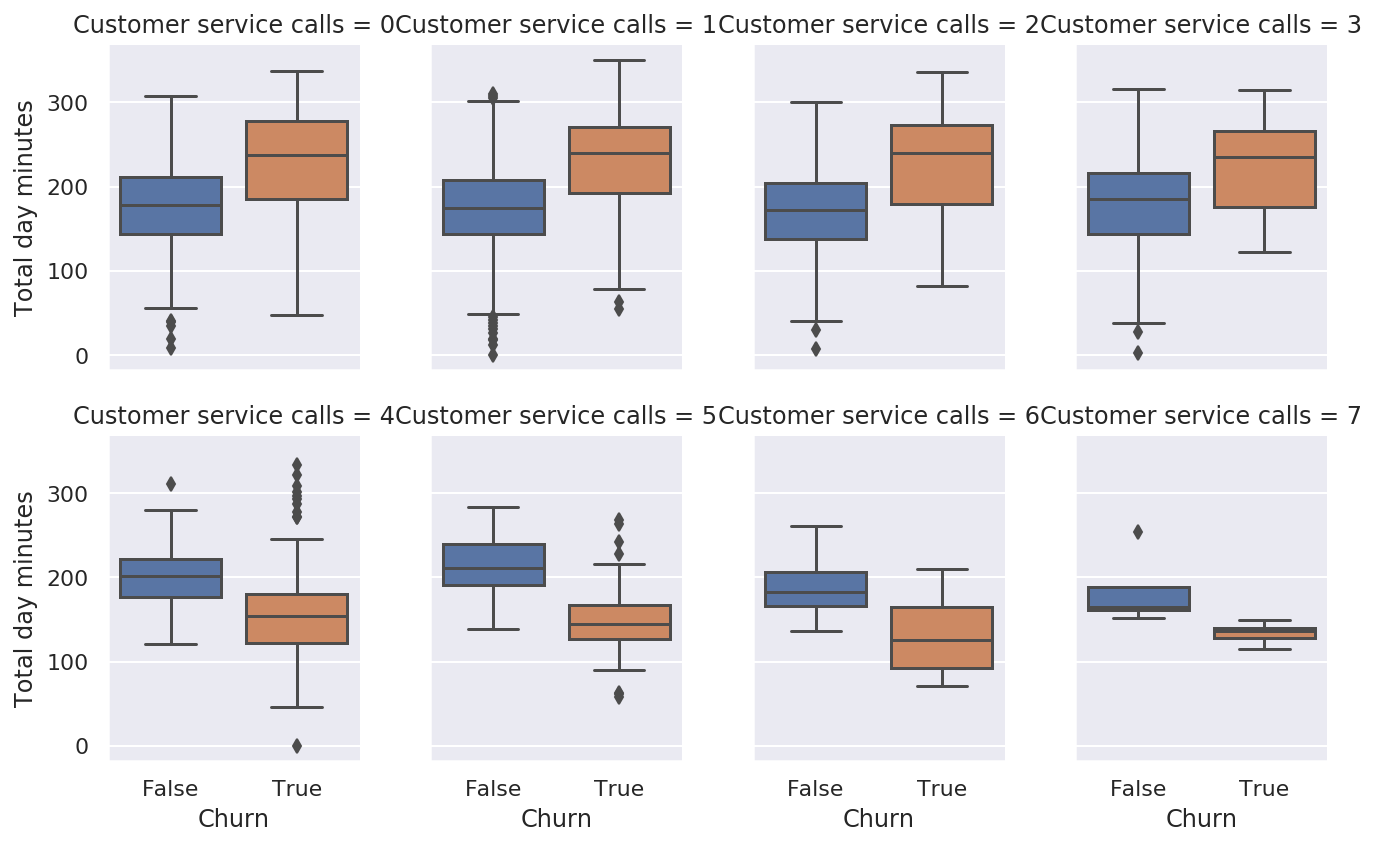

In [ ]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### Categorical vs. Categorical
To explore the number of customer service calls vs. churn, I used a count plot:

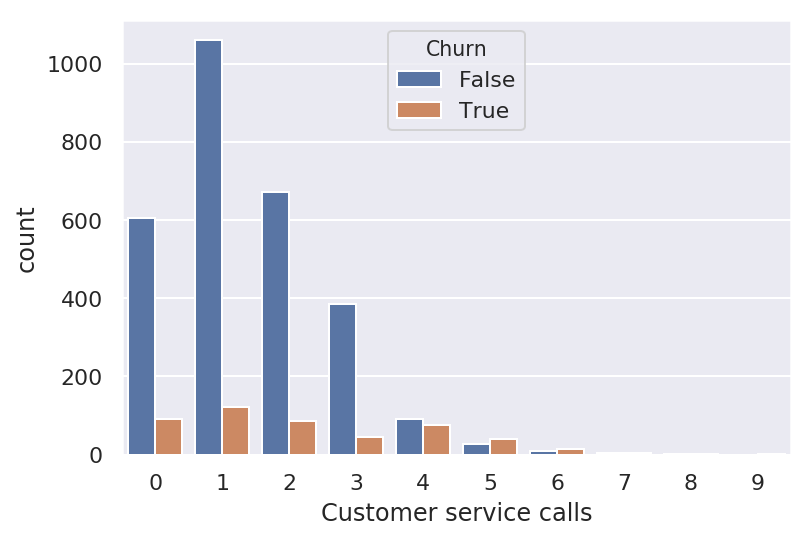

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.

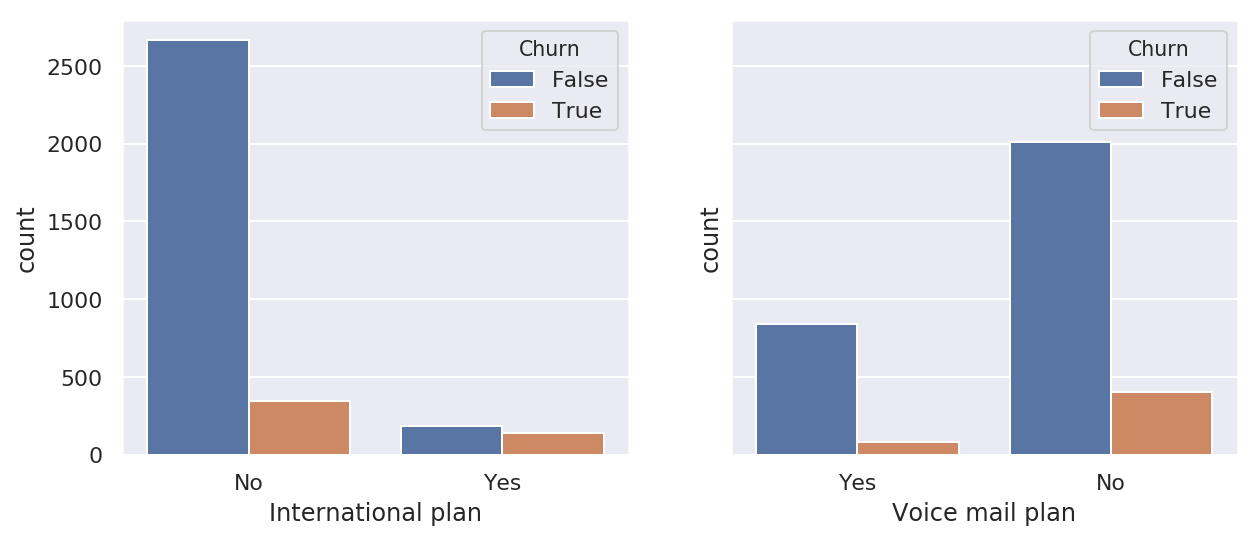

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

## 4. Whole dataset visualizations

#### Dimensionality reduction

A well-known method for dimensionality reduction is PCA (Principal Component Analysis). However, it’s linear, so I also tried a non-linear technique called t-SNE.

#### t-SNE

I created a 2D embedding using t-SNE to see if clusters emerged among customers:

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We will leave out the *State* and *Churn* features and convert the values "Yes"/"No" of the binary features into numerical values.

In [ ]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with `StandardScaler`.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

and plot it:

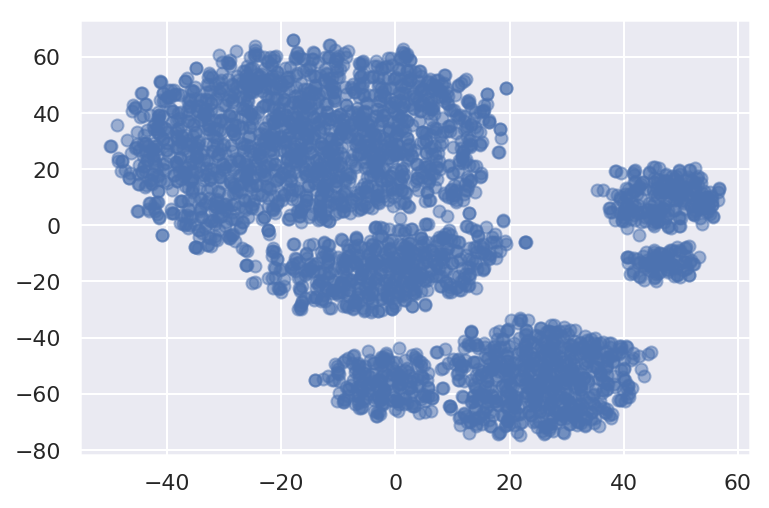

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

Let's color this t-SNE representation according to the churn (blue for loyal customers, and orange for those who churned).

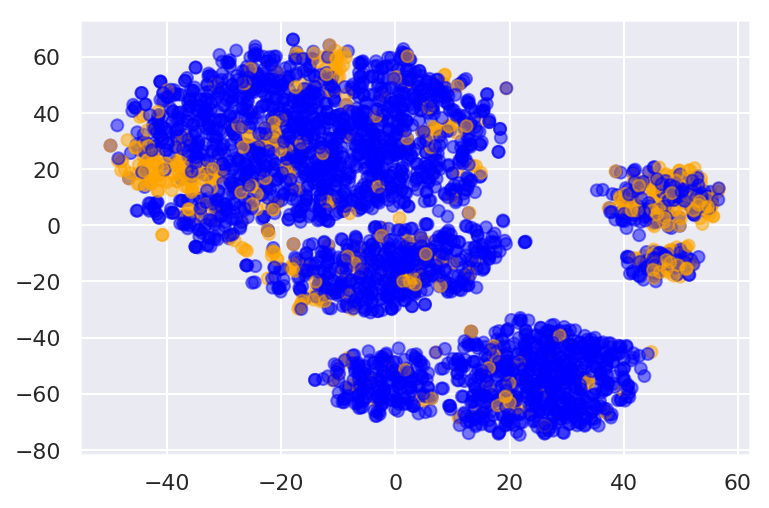

In [ ]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: *International Plan* and *Voicemail*. Orange dots here indicate instances that are positive for the corresponding binary feature.

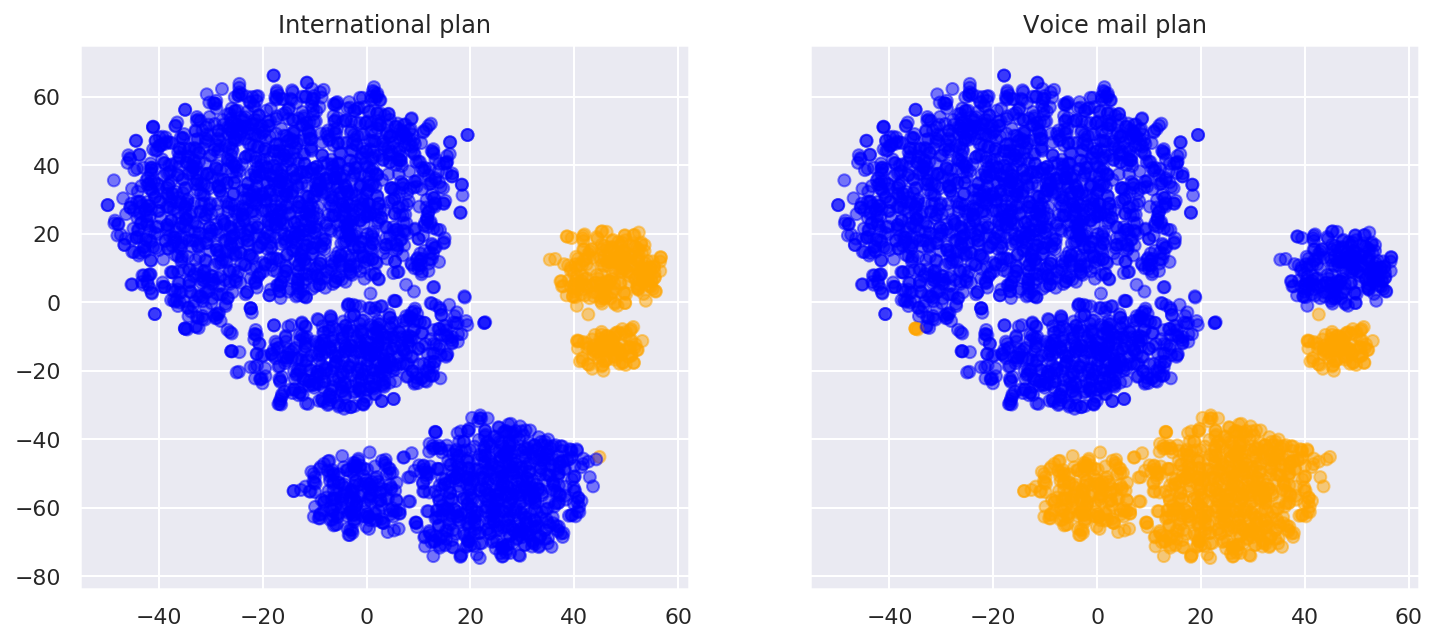

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);

Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in one cluster representing the people with the international plan but no voice mail.